# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction:

Stage 2: Training word and sentence embedding models




In this step, students train their own embedding models based on the given dataset and compare the model performance with the open-source embedding models.

> Data Preparation for Embeddings
*   Preprocess the text data for training embeddings, ensuring it is clean and well-structured.
*   Split the data into training and validation sets to assess model performance.

> Word Embedding Training
*   Train word embeddings using techniques like Word2Vec, FastText, or GloVe on the text data.
* Experiment with hyperparameters such as vector dimensions, context window size, and training epochs to optimize word embeddings.

> Sentence Embedding Training
* Develop sentence embeddings using methods like averaging word vectors, Doc2Vec, or
BERT embeddings.
* Fine-tune the sentence embeddings on the cleantech-specific data.
> Embedding Model Evaluation
* Assess the quality of both word and sentence embeddings using intrinsic evaluation methods,
including word similarity and analogy tasks.
* Compare the performance of the in-house embeddings to open source embeddings like Word2Vec, GloVe, or BERT embeddings.

> Transfer Learning with Open Source Models [Optional]
* Implement transfer learning by fine-tuning pre-trained open source models such as BERT or GPT-2 on the text data.
* Compare the performance of transfer learning with the in-house embeddings. This comparison could be done through evaluating the effectiveness of the embeddings in domain-specific tasks like topic classification.

> Outputs:
* Notebook with annotated model training steps.
* Notebook with visualizations comparing the performance of the embedding models.


In [21]:
# Top2Vec Modelling
%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

# Import Libraries

In [2]:
# Preprocessing
%%capture
!python -m spacy download en_core_web_sm

import numpy as np
import pandas as pd
import nltk
import spacy
import math
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from gensim.parsing.preprocessing import STOPWORDS
import re

nlp = spacy.load('en_core_web_sm')

In [3]:
# Preprocessing
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

True

In [4]:
# Exploratory Analysis
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from gensim.models.doc2vec import TaggedDocument
from sklearn import preprocessing

In [5]:
# Word2Vec and Doc2Vec
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from gensim.models import Word2Vec
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import torch.nn.functional as F
from collections import Counter
import subprocess

# Processing packages
import gensim
from gensim.models import Word2Vec
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from gensim.test.utils import datapath
from nltk.probability import FreqDist
import random
import copy

In [6]:
# Plots
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

In [22]:
# Install packages for Top2Vec
%%capture
from top2vec import Top2Vec

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Create a folder in the root directory
#!mkdir -p "/content/drive/My Drive/NLP_models"

# Load the Data

First step is to load our data from the csv file into a dataframe.

In [8]:
!wget https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
!unzip /content/cleantech_media_dataset_v1_20231109.zip

--2023-12-20 19:16:31--  https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip [following]
--2023-12-20 19:16:31--  https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14880158 (14M) [application/zip]
Saving to: ‘cleantech_media_dataset_v1_20231109.zip’

cleantech_media_dat 100%[===================>]  

In [9]:
df = pd.read_csv("cleantech_media_dataset_v1_20231109.csv")

In [10]:
# Inspect dataframe
pd.DataFrame.head(df)

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000


In [11]:
# Inspect dataframe shape
df.shape

(9607, 7)

The dataframe contains 9607 records and 7 attributes.

In [12]:
# Check for NAs
print(df.isnull().sum())

Unnamed: 0       0
title            0
date             0
author        9576
content          0
domain           0
url              0
dtype: int64


There are no NAs in the title or content columns which are the most important for topic modelling. We can also see that the author column has almost no data so we can drop this column.

# Preprocessing

We create a function to apply the first preprocessing steps. This includes dropping any duplicated records, changing the contents to lower case, removing non alpha-numeric characters, tokenizing the contents and adding a word count.

In [13]:
def preprocess_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['content_cleaned'] = df['content'].str.replace('\d+', '', regex=True)

    # Convert content to lower case
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: x.lower())

    # Remove symbols, but keep punctuation for sentence tokenization
    df['content_cleaned_sent'] = df['content_cleaned'].apply(lambda x: re.sub(r"[^a-zA-Z0-9.!?]+", r" ", x))

    # Remove symbols and punctuation
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Tokenize
    df['tokenized_content'] = df['content_cleaned'].apply(lambda x: nltk.word_tokenize(x))

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['tokenized_content'] = df['tokenized_content'].replace('[0-9]+', '', regex=True)

    # Add word count column
    df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))

    # Remove unused columns
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop('author', axis=1, inplace=True)

    return df

df = preprocess_data(df)

In [14]:
df[['content_cleaned', 'tokenized_content', 'word_count']].head()

,content_cleaned,tokenized_content,word_count
0,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415
1,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518
2,new us president joe biden took office this week with the uschina relationship at its worst in d...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679
3,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663
4,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,"[two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...",384


Lemmatize tokens

In [15]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])


def lemmatize_tokens(token_list):
    # Join the tokens back into a string
    joined_tokens = ' '.join(token_list)
    # Process the text with spacy
    doc = nlp(joined_tokens)
    # Return the lemmatized tokens
    return [token.lemma_ for token in doc]

# Apply the lemmatization function to the 'tokenized_content' column
spacy_lemma = df['tokenized_content'].apply(lemmatize_tokens)
spacy_lemma

0       [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...
1       [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...
2       [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...
3       [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...
4       [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...
                                                       ...                                                 
9602    [strata, clean, energy, have, close, a, million, revolving, loan, and, letter, of, credit, facil...
9603    [global, renewable, energy, developer, rste, be, deploy, sparkcognition, s, renewable, suite, ac...
9604    [veolia, north, america, a, provider, of, environmental, solution, in, the, us, and, canada, hav...
9605    [once, the, selfproc

In [16]:
df['spacy_lemma'] = spacy_lemma

In [17]:
# Remove stops
stop_words_spacy = nlp.Defaults.stop_words
stops_spacy = df['spacy_lemma'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])
print(len(stops_spacy[0]))

232


In [18]:
df['stops_spacy'] = stops_spacy
df.head()

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy
0,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas..."
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ..."
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension funds say they will divest roughly billion in shares of ...,"[two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...",384,"[two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...","[new, york, city, large, pension, fund, divest, roughly, billion, share, fossil, fuel, company, ..."


In [19]:
# Join text for each doc
df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

# Topic Labeling

From stage 1, we identified 8 topics that will be used in our topic classification model. Below we will rerun the top2vec model and assign the topics to the cleantech corpus.

In [23]:
documents = df["content"].tolist()
model2 = Top2Vec(documents, embedding_model='universal-sentence-encoder-multilingual')

INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


In [24]:
# Get topics
topics = model2.get_topics()

In [25]:
model2.hierarchical_topic_reduction(num_topics=8)

[[1, 26, 21, 35, 51, 0],
 [34, 40, 58, 56, 59, 27, 61, 8, 16, 12, 52, 19, 31, 29, 46, 47, 22],
 [23, 15, 30, 9, 45, 10, 2],
 [32, 64, 14, 36, 42, 28, 44, 60, 4],
 [17, 5, 62, 25, 41, 53, 3],
 [38, 39, 18, 48, 7],
 [6, 63, 49, 65, 20, 50, 11],
 [43, 54, 37, 55, 33, 24, 57, 13]]

In [26]:
# # Creating a dataframe with topic numbers and topic words
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model2.get_topic_sizes(reduced=True)
topic_words, word_scores, topic_num = model2.get_topics(len(topic_nums))

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    current_topic_words, current_word_scores, current_topic_num = model2.get_topics()
    # Append the information for the current topic to the list
    # Words scores were excluded from the data frame because it did not add value to the analysis
    topics_data.append({'topic_nums': current_topic_num[i], 'topic_sizes': topic_sizes[i], 'topic_words': current_topic_words[i]})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
topics_df

,topic_nums,topic_sizes,topic_words
0,0,1802,"[solar, solarpower, solarapp, solarize, agrivoltaic, photovoltaic, solaredge, agrivoltaics, geoe..."
1,1,1651,"[geothermal, geoenergy, hydrothermal, thinkgeoenergy, bioenergy, energies, energie, energy, geos..."
2,2,1358,"[environmentally, environmental, ecological, greenpeace, eco, environment, ozone, greentech, eco..."
3,3,1259,"[solar, solarpower, agrivoltaic, agrivoltaics, solarapp, photovoltaic, solarize, terawatt, geoen..."
4,4,1079,"[solar, solarpower, solarapp, agrivoltaic, solarize, agrivoltaics, photovoltaic, photovoltaics, ..."
5,5,837,"[geoenergy, renewables, energies, energie, thinkgeoenergy, solarpower, bioenergy, totalenergies,..."
6,6,833,"[electrics, superchargers, electricity, tesla, supercharger, electric, renewables, electrify, el..."
7,7,788,"[hydrogen, renewables, hydropower, geoenergy, biofuels, hydrocarbons, hydrocarbon, hydroelectric..."


In [27]:
# # Creating a dataframe with documents assigned to the topics and document scores
# Get the topic sizes and topic numbers
topic_sizes, topic_nums = model2.get_topic_sizes(reduced = True)

# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=['topic', 'document_ids','document_scores'])

# Iterate over topics
for i in range(len(topic_sizes)):
    # Get documents, document scores, and document IDs for the current topic
    documents, document_scores, document_ids = model2.search_documents_by_topic(reduced = True, topic_num=i, num_docs=topic_sizes[i])

    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame({'topic': i, 'document_ids': document_ids, 'document_scores': document_scores})

    # Append the DataFrame for the current topic to the results DataFrame
    results_df2 = pd.concat([results_df2, topic_df], ignore_index=True)

# Display the results DataFrame
results_df2

,topic,document_ids,document_scores
0,0,8986,0.874407
1,0,4749,0.871528
2,0,1150,0.864809
3,0,9597,0.861147
4,0,9256,0.858639
...,...,...,...
9602,7,2605,0.303875
9603,7,2560,0.302965
9604,7,2578,0.302060
9605,7,2583,0.297330


Assign the documents to the identified topics.

In [28]:
# the index of each document in the original corpus is the id
# Therefor we can simply join the two dataframes on the index to assign the topics

# Merge DataFrames on the index of df and the document ids from results_df2 column
df_labeled = pd.merge(df, results_df2, left_index=True, right_on='document_ids', how='inner')

In [29]:
# Merge DataFrames on the 'ID' column
df_labeled

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy,final_cleaned,topic,document_ids,document_scores
2363,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...",qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...,1,0,0.757905
837,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...",nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...,0,1,0.742306
3210,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...",new president joe biden office week uschina relationship bad decade energy come play big role re...,1,2,0.655492
3373,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...",slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...,1,3,0.586120
2843,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension fund

# Word Embeddings


## Word2Vec Embedding

### CBOW

In [ ]:
# Set seeds for reproducibility
SEED = 40
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["stops_spacy"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

In [ ]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 55, epochs=50 )

In [ ]:
# getting the training loss value
training_loss = model.get_latest_training_loss()
print(training_loss)

Show the model works by obtaining a vector from a common word in the model.

In [ ]:
vec_energy = model.wv['energy']
vec_energy

Retrieve Vocabulary Words

In [ ]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

Word2Vec supports word similarity tasks.

In [ ]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

In [ ]:
# 5 most similar words to energy
model.wv.most_similar(positive=['energy'], topn=5)

In [ ]:
# Which word does not belong in the sequence
print(model.wv.doesnt_match(['energy', 'solar', 'wind', 'water', 'electricity', 'president']))

We can evaluate the effectiveness of Word2Vec with word analogy or word pair methods. Word analogies evaluates the model on a set of syntactic and semantic word analogies. The output is a tuple containing a total accuracy and a list of dictionaries for each section with correct and incorrect analogies. Word similarity evaluates the model on a dataset containing word pairs with human-assigned similarity judgments. The output includes the correlation coefficient and p-value.

In [ ]:
# Word Analogy Evaluation
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogy_scores[0])

In [ ]:
# Word Similarity Evaluation
model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

* Pearson correlation coefficient: 0.41
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.41869577705312544
* Coverage: 18.69% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics provide insights into how well the Word2Vec model aligns with human judgments of word similarity.

In [ ]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Word2Vec CBOW', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
words = []
embeddings = []
for word in list(model.wv.key_to_index.keys()):
    embeddings.append(model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

def tsne_plot_2d(label, embeddings, a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors, alpha=a)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_2d('Word2Vec CBOW Embeddings', embeddings_2d, a=0.1)

In [ ]:
model.wv.save_word2vec_format("/content/drive/My Drive/NLP_models/CBOW_model.model")

### Skip-Gram

Build a new model using skip-gram.

In [ ]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

skip_model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 72, sg=1, hs=0, epochs=50 )

NameError: ignored

In [ ]:
# getting the training loss value
training_loss = skip_model.get_latest_training_loss()
print(training_loss)

In [ ]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, skip_model.wv.similarity(w1, w2)))

In [ ]:
# 5 most similar words to energy
skip_model.wv.most_similar(positive=['energy'], topn=5)

In [ ]:
# Word Analogy Evaluation
analogies = skip_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

In [ ]:
# Word Similarity Evaluation
skip_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

* Pearson correlation coefficient: 0.41
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.4
* Coverage: 18% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics show a slight improvement from the CBOW word2vec model.

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [ ]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in skip_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(skip_model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
tsne_plot_similar_words('Similar words from Word2Vec Skip Gram', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
words = []
embeddings = []
for word in list(skip_model.wv.key_to_index.keys()):
    embeddings.append(skip_model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

tsne_plot_2d('Word2Vec Skip Gram Embeddings', embeddings_2d, a=0.1)

The skip gram model has done a much better job of grouping the embeddings and identifying the word similarities.

In [ ]:
skip_model.wv.save_word2vec_format("/content/drive/My Drive/NLP_models/skip_gram_model.model")

## FastText

In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import pandas as pd
import string
import re

First a dictionary is created to contain the information about the article title and article contents. This will allow us to later keep track of which embeddings belong to which article.

In [ ]:
data_ids = []

for index, row in df.iterrows():
    article_id = row['title']
    article = row['content_cleaned']

    data_ids.append({'article_id': article_id, 'content': article})


In [ ]:
data_ids[0]

{'article_id': 'Qatar to Slash Emissions as LNG Expansion Advances',
 'content': 'qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase  of its planned  million ton per year lng expansion in its latest sustainability report published on wednesday qp said its goals include  reducing the emissions intensity of qatars lng facilities by  and of its upstream facilities by at least   the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than  and has raised its carbon capture and storage ambitions from  million tonsyr to  million tonsyr by  about  million tonsyr of the carbon capture goal will come from the  million tonyr phase  of the lng expansion also known as the north field east project a further  million tonsyr will come from phase  known as the north field south project which will raise qatars lng capacity by a further  million tonsyr qatar currently has an lng production capacity of 

Data is split into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_x, valid_x = train_test_split(
    data_ids,
    test_size=0.5,
    random_state=42
    )

Sanity check to ensure traininga and validation data are correct sizes.

In [ ]:
# Sanity check
len(train_x) + len(valid_x)  == len(data_ids)
print(len(train_x), len(test_x))

4803 961


We check the size of the training vocabulary. If it is too large we will have to reduce it in the model training in order to increase efficiency.



In [ ]:
vocabulary = set()
for article in train_x:
    tokens = article['content'].split()
    vocabulary.update(tokens)

print("Vocabulary size:", len(vocabulary))

Vocabulary size: 61260


The vocabulary is too large (>30K words). We should reduce it when training our word embedding model.

Content has to be tokenized in order to train the FastText word embedding model.



In [ ]:
corpus_tokens = [doc['content'].split() for doc in train_x]

We check to make sure the tokenization worked:

In [ ]:
corpus_tokens[0][:5]

['oil', 'and', 'gas', 'price', 'spikes']

Now we train some word embedding models. We set the max vocabulary size to 30,000. Other parameters are set randomly initially. The only parameter that is changed between the two models is vector size. We will then perform some intrinsic evaluation to see which model performs better.

In [ ]:
max_vocab_size = 30000

# Train FastText model 1
model1 = FastText(sentences=corpus_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1, max_vocab_size=max_vocab_size)

In [ ]:
model2 = FastText(sentences=corpus_tokens, vector_size=200, window=5, min_count=1, workers=4, sg=1, max_vocab_size=max_vocab_size)

We define some intrinsic tests such as word similarity tests and analogy tests to perform using our models. We use a combination of self-made similarity tests, using words regarding cleantech topics, and premade tests. The better performing model should show better recognition of similar words, as well as a higher pearson's correlation on the analogy test. Which indicates a correlation between the model's predicted word and a human's predicted word.

In [ ]:
def word_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        return model.wv.similarity(word1, word2)
    else:
        return None

def run_similarity_tests(models, similarity_tests, analogy_tests=None, word_similarity_tests=None):
    for model_name, model in models.items():
        print(f"\nTesting Model: {model_name}")

        for test_name, (word1, word2) in similarity_tests.items():
            similarity_score = word_similarity(model, word1, word2)

            if similarity_score is not None:
                print(f"{test_name} - Similarity between '{word1}' and '{word2}': {similarity_score:.4f}")
            else:
                print(f"{test_name} - One or both words not in the vocabulary.")

        if analogy_tests is not None:
            analogy_score = model.wv.evaluate_word_analogies(datapath(analogy_tests))
            print(f"\nAnalogy Score for {model_name}: {analogy_score[0]}")

        if word_similarity_tests is not None:
            word_similarity_score = model.wv.evaluate_word_pairs(datapath(word_similarity_tests))
            print(f"Word Similarity Score for {model_name}: {word_similarity_score[0]}")


In [ ]:
models = {
    "Model1": model1,
    "Model2": model2,
}

similarity_tests = {
    "Renewable Energy": ("renewable", "green"),
    "Solar Power": ("photovoltaic", "pv"),
    "Clean Technology": ("tech", "technology"),
    "Climate Change": ("climate", "weather"),
    "Electric Vehicles": ("car", "vehicle"),
    "Sustainability": ("sustainability", "sustainable"),
}

# Specify analogy and word similarity tests
analogy_tests = 'questions-words.txt'
word_similarity_tests = 'wordsim353.tsv'

# Run all tests on multiple models
run_similarity_tests(models, similarity_tests, analogy_tests, word_similarity_tests)



Testing Model: Model1
Renewable Energy - Similarity between 'renewable' and 'green': 0.6083
Solar Power - Similarity between 'photovoltaic' and 'pv': 0.7447
Clean Technology - Similarity between 'tech' and 'technology': 0.5842
Climate Change - Similarity between 'climate' and 'weather': 0.4179
Electric Vehicles - Similarity between 'car' and 'vehicle': 0.7488
Sustainability - Similarity between 'sustainability' and 'sustainable': 0.5471

Analogy Score for Model1: 0.4161628078454505
Word Similarity Score for Model1: PearsonRResult(statistic=0.42124133552082066, pvalue=4.812093583463818e-12)

Testing Model: Model2
Renewable Energy - Similarity between 'renewable' and 'green': 0.3717
Solar Power - Similarity between 'photovoltaic' and 'pv': 0.6400
Clean Technology - Similarity between 'tech' and 'technology': 0.5603
Climate Change - Similarity between 'climate' and 'weather': 0.3355
Electric Vehicles - Similarity between 'car' and 'vehicle': 0.6235
Sustainability - Similarity between 'su

As we can see from the tests above model two performs slightly better on the Analogy Score and Word Similarity Score. On the word similarities that we created regarding clean-tech topics, however, model 1 seems to perform better. This could mean model 1 is better at capturing semantic detail, this is interesting because usually a larger word_vector size corresponds to better embeddings. It could also be that our self-made similarity tests are not as robust as the pre-made similarity tests.

##GloVe

In [30]:
df_labeled.head()

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy,final_cleaned,topic,document_ids,document_scores
2363,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...",qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...,1,0,0.757905
837,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...",nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...,0,1,0.742306
3210,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...",new president joe biden office week uschina relationship bad decade energy come play big role re...,1,2,0.655492
3373,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...",slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...,1,3,0.586120
2843,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension fund

First of all we split data into train, validations and test sets.

In [31]:
# Set seeds for reproducibility
SEED = 37
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

data = copy.deepcopy(df_labeled['final_cleaned'])

# We define how to split the data
split_train = int(len(data) * 0.8)
split_val = (len(data) - split_train) // 2
split_test = len(data) - split_train - split_val

train_data = data[:split_train]
data = data[split_train:]

val_data = data[:split_val]
data = data[split_val:]

test_data = data

# Sanity check
assert len(train_data + val_data + test_data) == len(df_labeled['final_cleaned'])
print(len(train_data), len(val_data), len(test_data))

7685 961 961


In [32]:
# Take a look at the train data
train_data[:10]

2363    qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...
837     nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...
3210    new president joe biden office week uschina relationship bad decade energy come play big role re...
3373    slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...
2843    new york city large pension fund divest roughly billion share fossil fuel company aim insulate h...
3446    japans supreme court likely arbiter judicial schism government bear responsibility liability mar...
9389    oil natural gas industry official look seat table administration president joe biden seek compre...
9332    new great game emerge energy business rise china compete position political economic landscape s...
3332    close th anniversary fukushima daiichi disaster plan deal million ton tritiate water disabled fa...
9214    cold weather generat

To use GloVe tecnhique we need to take a look at amount of vocabulary to make a decision if we need to reduce it.



In [33]:
vocabulary = set()

# Iterate over each row of the train_data
for document in train_data:
    tokens = document.split()
    for token in tokens:
        vocabulary.add(token)


print(f"Vocabulary size: {len(vocabulary)}")

Vocabulary size: 70877


The vocabulary is too large, since the standart is >30k words. Let's see what's the minimum occurrence of word should be.



In [34]:
all_tokens = []

# Iterate over each row of the train_data
for document in train_data:
    tokens = document.split()
    all_tokens.extend(tokens)

# Count the frequency of each word in the corpus
word_freq = Counter(all_tokens)

# Filter out words that appear less than the threshold
min_occurrence = 3
vocabulary = {word for word, freq in word_freq.items() if freq >= min_occurrence}

print(f"Reduced vocabulary size: {len(vocabulary)}")

Reduced vocabulary size: 29865


In [35]:
# Create the mappindg word - index and vice-versa
word2idx = {'_PAD_': 0, '_UNK_': 1}
for word in vocabulary:
  word2idx[word] = len(word2idx)
idx2word = {idx:word for word, idx in word2idx.items()}
word2idx

{'_PAD_': 0,
 '_UNK_': 1,
 'obsess': 2,
 'commons': 3,
 'harvie': 4,
 'unimelt': 5,
 'yorker': 6,
 'confess': 7,
 'contaminant': 8,
 'soec': 9,
 'contributing': 10,
 'sullom': 11,
 'endorsement': 12,
 'jain': 13,
 'severstal': 14,
 'everexpande': 15,
 'christian': 16,
 'lae': 17,
 'spin': 18,
 'tania': 19,
 'pacific': 20,
 'cotter': 21,
 'cpower': 22,
 'strongerthanexpected': 23,
 'mosque': 24,
 'vf': 25,
 'fortnight': 26,
 'plano': 27,
 'quickrelease': 28,
 'techle': 29,
 'ignition': 30,
 'stoner': 31,
 'crud': 32,
 'collin': 33,
 'vienna': 34,
 'harleydavidson': 35,
 'harry': 36,
 'playing': 37,
 'greenwashe': 38,
 'aggressively': 39,
 'fonsi': 40,
 'elude': 41,
 'ruminal': 42,
 'reagan': 43,
 'finalist': 44,
 'snowball': 45,
 'plasticize': 46,
 'caretaker': 47,
 'sps': 48,
 'goodrich': 49,
 'wartime': 50,
 'birch': 51,
 'payout': 52,
 'motivated': 53,
 'rigor': 54,
 'enrol': 55,
 'reheisboyd': 56,
 'sendai': 57,
 'fernandez': 58,
 'doha': 59,
 'networking': 60,
 'woody': 61,
 'fee':

In [36]:
idx2word

{0: '_PAD_',
 1: '_UNK_',
 2: 'obsess',
 3: 'commons',
 4: 'harvie',
 5: 'unimelt',
 6: 'yorker',
 7: 'confess',
 8: 'contaminant',
 9: 'soec',
 10: 'contributing',
 11: 'sullom',
 12: 'endorsement',
 13: 'jain',
 14: 'severstal',
 15: 'everexpande',
 16: 'christian',
 17: 'lae',
 18: 'spin',
 19: 'tania',
 20: 'pacific',
 21: 'cotter',
 22: 'cpower',
 23: 'strongerthanexpected',
 24: 'mosque',
 25: 'vf',
 26: 'fortnight',
 27: 'plano',
 28: 'quickrelease',
 29: 'techle',
 30: 'ignition',
 31: 'stoner',
 32: 'crud',
 33: 'collin',
 34: 'vienna',
 35: 'harleydavidson',
 36: 'harry',
 37: 'playing',
 38: 'greenwashe',
 39: 'aggressively',
 40: 'fonsi',
 41: 'elude',
 42: 'ruminal',
 43: 'reagan',
 44: 'finalist',
 45: 'snowball',
 46: 'plasticize',
 47: 'caretaker',
 48: 'sps',
 49: 'goodrich',
 50: 'wartime',
 51: 'birch',
 52: 'payout',
 53: 'motivated',
 54: 'rigor',
 55: 'enrol',
 56: 'reheisboyd',
 57: 'sendai',
 58: 'fernandez',
 59: 'doha',
 60: 'networking',
 61: 'woody',
 62: 'f

In [37]:
with open('corpus.txt', 'w', encoding='utf-8') as file:
    for document in train_data:
        file.write(document + '\n')

For using GloVe tecnhique we clone the repository from official GloVe github.



In [38]:
!git clone https://github.com/stanfordnlp/glove.git


Cloning into 'glove'...
remote: Enumerating objects: 656, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 656 (delta 36), reused 47 (delta 32), pack-reused 592
Receiving objects: 100% (656/656), 245.96 KiB | 8.20 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [39]:
%cd glove
!make

/content/glove
mkdir -p build
gcc -c src/vocab_count.c -o build/vocab_count.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc -c src/cooccur.c -o build/cooccur.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
src/cooccur.c: In function ‘merge_files’:
src/cooccur.c:180:9: warning: ignoring return value of ‘fread’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
  180 |         fread(&new, sizeof(CREC), 1, fid[i]);
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:190:5: warning: ignoring return value of ‘fread’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
  190 |     fread(&new, sizeof(CREC), 1, fid[i]);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:203:9: warning: ignoring return value of ‘fread’ d

In [40]:
!mv ../corpus.txt ./corpus.txt


In [41]:
!pwd
!ls

/content/glove
build  corpus.txt  demo.sh  eval  LICENSE  Makefile  randomization.test.sh  README.md  src


Next we will prepare vocabulary and co-occurrence matrix using GloVe.



In [42]:
# Prepare vocabulary and co-occurrence matrix
!build/vocab_count -min-count 3 -verbose 2 < corpus.txt > vocab.txt
!build/cooccur -memory 4.0 -vocab-file vocab.txt -verbose 2 -window-size 15 < corpus.txt > cooccurrence.bin
!build/shuffle -memory 4.0 -verbose 2 < cooccurrence.bin > cooccurrence.shuf.bin

BUILDING VOCABULARY
Processed 0 tokens.100000 tokens.200000 tokens.300000 tokens.400000 tokens.500000 tokens.600000 tokens.700000 tokens.800000 tokens.900000 tokens.1000000 tokens.1100000 tokens.1200000 tokens.1300000 tokens.1400000 tokens.1500000 tokens.1600000 tokens.1700000 tokens.1800000 tokens.1900000 tokens.2000000 tokens.2100000 tokens.2200000 tokens.2300000 tokens.2400000 tokens.2500000 tokens.2600000 tokens.2700000 tokens.2800000 tokens.2900000 tokens.3000000 tokens.3100000 tokens.3200000 tokens.3300000 tokens.3400000 tokens.Processed 3422232 tokens.
Counted 70877 unique words.
Truncating vocabulary at min count 3.
Using vocabulary of size 29865.

COUNTING COOCCURRENCES
window size: 15
context: symmetric
max product: 13752509
overflow length: 38028356
Reading vocab from file "vocab.txt"...loaded 29865 words.
Building lookup table...table contains 71100681 elements.
Processing token: 01000002000003000004000005000006000007000008000009000001000000110000012000001300000140000015000

The next step is to train 3 models using different hyperparameters.



In [43]:
!build/glove -save-file vectors -threads 8 -input-file cooccurrence.shuf.bin -x-max 10 -iter 15 -vector-size 300 -binary 2 -vocab-file vocab.txt -verbose 2

TRAINING MODEL
Read 17078096 lines.
Initializing parameters...Using random seed 1703100685
done.
vector size: 300
vocab size: 29865
x_max: 10.000000
alpha: 0.750000
12/20/23 - 07:31.47PM, iter: 001, cost: 0.086288
12/20/23 - 07:32.08PM, iter: 002, cost: 0.064929
12/20/23 - 07:32.30PM, iter: 003, cost: 0.055468
12/20/23 - 07:32.51PM, iter: 004, cost: 0.049386
12/20/23 - 07:33.12PM, iter: 005, cost: 0.044570
12/20/23 - 07:33.33PM, iter: 006, cost: 0.040338
12/20/23 - 07:33.55PM, iter: 007, cost: 0.036561
12/20/23 - 07:34.16PM, iter: 008, cost: 0.033305
12/20/23 - 07:34.37PM, iter: 009, cost: 0.030667
12/20/23 - 07:34.58PM, iter: 010, cost: 0.028558
12/20/23 - 07:35.19PM, iter: 011, cost: 0.026894
12/20/23 - 07:35.40PM, iter: 012, cost: 0.025533
12/20/23 - 07:36.01PM, iter: 013, cost: 0.024417
12/20/23 - 07:36.22PM, iter: 014, cost: 0.023440
12/20/23 - 07:36.44PM, iter: 015, cost: 0.022668


In [44]:
!build/glove -save-file vectors_model2 -threads 8 -input-file cooccurrence.shuf.bin -x-max 40 -iter 20 -vector-size 200 -binary 2 -vocab-file vocab.txt -verbose 2

TRAINING MODEL
Read 17078096 lines.
Initializing parameters...Using random seed 1703101007
done.
vector size: 200
vocab size: 29865
x_max: 40.000000
alpha: 0.750000
12/20/23 - 07:37.02PM, iter: 001, cost: 0.040214
12/20/23 - 07:37.16PM, iter: 002, cost: 0.030751
12/20/23 - 07:37.30PM, iter: 003, cost: 0.025996
12/20/23 - 07:37.45PM, iter: 004, cost: 0.022972
12/20/23 - 07:38.00PM, iter: 005, cost: 0.020862
12/20/23 - 07:38.14PM, iter: 006, cost: 0.019252
12/20/23 - 07:38.29PM, iter: 007, cost: 0.017950
12/20/23 - 07:38.43PM, iter: 008, cost: 0.016839
12/20/23 - 07:38.57PM, iter: 009, cost: 0.015878
12/20/23 - 07:39.12PM, iter: 010, cost: 0.015028
12/20/23 - 07:39.26PM, iter: 011, cost: 0.014291
12/20/23 - 07:39.41PM, iter: 012, cost: 0.013648
12/20/23 - 07:39.55PM, iter: 013, cost: 0.013093
12/20/23 - 07:40.10PM, iter: 014, cost: 0.012622
12/20/23 - 07:40.25PM, iter: 015, cost: 0.012208
12/20/23 - 07:40.39PM, iter: 016, cost: 0.011849
12/20/23 - 07:40.54PM, iter: 017, cost: 0.011533
12

In [45]:
!build/glove -save-file vectors_model3 -threads 8 -input-file cooccurrence.shuf.bin -x-max 70 -iter 25 -vector-size 100 -binary 2 -vocab-file vocab.txt -verbose 2

TRAINING MODEL
Read 17078096 lines.
Initializing parameters...Using random seed 1703101300
done.
vector size: 100
vocab size: 29865
x_max: 70.000000
alpha: 0.750000
12/20/23 - 07:41.48PM, iter: 001, cost: 0.029075
12/20/23 - 07:41.56PM, iter: 002, cost: 0.022325
12/20/23 - 07:42.05PM, iter: 003, cost: 0.018984
12/20/23 - 07:42.12PM, iter: 004, cost: 0.016812
12/20/23 - 07:42.21PM, iter: 005, cost: 0.015266
12/20/23 - 07:42.29PM, iter: 006, cost: 0.014116
12/20/23 - 07:42.37PM, iter: 007, cost: 0.013219
12/20/23 - 07:42.45PM, iter: 008, cost: 0.012487
12/20/23 - 07:42.53PM, iter: 009, cost: 0.011878
12/20/23 - 07:43.01PM, iter: 010, cost: 0.011371
12/20/23 - 07:43.09PM, iter: 011, cost: 0.010942
12/20/23 - 07:43.17PM, iter: 012, cost: 0.010587
12/20/23 - 07:43.25PM, iter: 013, cost: 0.010277
12/20/23 - 07:43.33PM, iter: 014, cost: 0.010023
12/20/23 - 07:43.41PM, iter: 015, cost: 0.009794
12/20/23 - 07:43.49PM, iter: 016, cost: 0.009600
12/20/23 - 07:43.57PM, iter: 017, cost: 0.009432
12

We'll assign to variables vectors from 3 models.



In [46]:
def load_word_vectors(filename):
    word_vectors = {}
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors


word_vectors = load_word_vectors('vectors.txt')
word_vectors2 = load_word_vectors('vectors_model2.txt')
word_vectors3 = load_word_vectors('vectors_model3.txt')

# Sentence Embeddings

## Doc2Vec

Prepare training and test data.

In [ ]:
# Set seeds for reproducibility
SEED = 99
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["final_cleaned"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

We define a funciton to read the corpus line by line (each line of the corpus represents a document), tokenize text into individual words, remove puctuation and set to lowercase. To train the model, we need to associate a tag/number with each document of the training corpus. In our case, the tag is simply the zero-based line number.

In [ ]:
def read_corpus(data, tokens_only=False):
    for i, line in enumerate(data):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(train_data,))
test_corpus = list(read_corpus(test_data, tokens_only=True))

In [ ]:
# Look at training and test corpus
print(train_corpus[:2])
print(test_corpus[:2])

The testing is just a list of lists and should not contain any tags.

Now we intitiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. The minimum word count is set to 2 in order to discard words with very few occurences.

In [ ]:
doc_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

Build the vocabulary which is a list of all the unique words extracted from the training corpus.

In [ ]:
doc_model.build_vocab(train_corpus)

In [ ]:
# Can view the vocabulary below
doc_model.wv.index_to_key

In [ ]:
# Can view additional attributes using the get_vecattr method
print(f"Word 'energy' appeared {doc_model.wv.get_vecattr('energy', 'count')} times in the training corpus.")

Next, we train the model.

In [ ]:
doc_model.train(train_corpus, total_examples=doc_model.corpus_count, epochs=doc_model.epochs)

Use the trained model to infer a vector for any piece of text to ensure the model is working.

In [ ]:
vector = doc_model.infer_vector([ 'instead','quickly','creating','neutral','planned','farms'])
print(vector)

Assess the model by obtaining vector representations for each document in the training set. The idea is to rank the documents based on their self-similarity. The expectation is that, if the model has overfit the training data, all the ranks will be less than 2. This is because a document is most similar to itself, and potentially one other document, indicating overfitting. If overfitting has occurred, the model should be able to find similar documents very easily among the training corpus. Additionally, the second ranks are tracked. This is useful for comparing less similar documents. If the model has overfit, the second-ranked documents should be less similar, reflecting a distinction between very similar and less similar documents.

In [ ]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = doc_model.infer_vector(train_corpus[doc_id].words)
    sims = doc_model.dv.most_similar([inferred_vector], topn=len(doc_model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

Now we will count how each document ranks with respect to the training corpus.

In [ ]:
import collections

counter = collections.Counter(ranks)
print(counter)

Basically, greater than 99% of the inferred documents are found to be most similar to itself and about 1% of the time it is mistakenly most similar to another document. Checking the inferred-vector against a training-vector is a sort of ‘sanity check’ as to whether the model is behaving in a usefully consistent manner, though not a real ‘accuracy’ value.

In [ ]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc_model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

The most similar document usually has a similarity score close to 1.0, while the second-ranked document should have a significantly lower similarity score, assuming the documents are different. However, the documents in our corpus show more similarieties because the documents all discuss various forms of clean energy. This can also be seen by running the below cell mutliple times.

In [ ]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Using the same approach as above, we will infer the vector for a randomly chosen test document and compare the results.

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = doc_model.infer_vector(test_corpus[doc_id])
sims = doc_model.dv.most_similar([inferred_vector], topn=len(doc_model.dv))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc_model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

In [ ]:
# Get document vectors and corresponding tags
doc_tags = doc_model.dv.index_to_key
doc_vectors = [doc_model.dv[tag] for tag in doc_tags]

# Convert the list to a NumPy array
doc_vectors = np.array(doc_vectors)

tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(doc_vectors)

tsne_plot_2d('Doc2Vec Embeddings', embeddings_2d, a=0.1)

##Averaging word vectors

In [83]:
# Set seeds for reproducibility
SEED = 87
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
data = copy.deepcopy(df_labeled['stops_spacy'])
data1 = copy.deepcopy(df_labeled['stops_spacy'])

# We define how to split the data
split_train1 = int(len(data1) * 0.8)
split_val1 = (len(data1) - split_train1) // 2
split_test1 = len(data1) - split_train1 - split_val1

train_data1 = data1[:split_train1]
data1 = data1[split_train1:]

val_data1 = data1[:split_val1]
data1 = data1[split_val1:]

test_data1 = data1

# Sanity check
assert len(train_data1 + val_data1 + test_data1) == len(df_labeled["stops_spacy"])
print(len(train_data1), len(val_data1), len(test_data1), len(data))

7685 961 961 9607


Now we can proceed with generating sentence embeddings.

In [84]:
def sentence_embedding(sentences, word_vectors):
    all_embeddings = []
    for sentence in sentences:
        words = sentence
        vectors = [word_vectors[word] for word in words if word in word_vectors]
        if len(vectors) == 0:
            vectors = [np.zeros(len(next(iter(word_vectors.values()))))]
        sentence_embedding = np.mean(vectors, axis=0)
        all_embeddings.append(sentence_embedding)
    return all_embeddings

We train models using different in-hourse word vectors.

In [85]:
embedding_model = sentence_embedding(train_data1, word_vectors)
embedding_model2 = sentence_embedding(train_data1, word_vectors2)
embedding_model3 = sentence_embedding(train_data1, word_vectors3)

print("First few embeddings of embedding_model:", np.array(embedding_model2)[:5])


First few embeddings of embedding_model: [[-1.63789988e-01  5.58592342e-02  2.03077331e-01 -1.55923516e-01
  -2.21274998e-02  6.33201981e-03  1.47217810e-01 -1.36184722e-01
   4.54175174e-02  2.59621084e-01  2.05166325e-01  1.90516990e-02
  -1.21982194e-01 -6.93223327e-02 -1.83904022e-02 -5.89666795e-03
   6.49722293e-02 -5.35133719e-01 -1.88237831e-01  1.09391600e-01
  -1.97364792e-01  2.84052879e-01  1.76847845e-01 -1.85750857e-01
  -1.80469260e-01 -5.56606352e-02  3.89283478e-01 -1.59009937e-02
  -1.17171466e-01 -3.42048734e-01 -4.06643391e-01  1.10785492e-01
  -3.18424627e-02 -4.43478152e-02  4.24109735e-02 -1.86507195e-01
   1.14838824e-01 -6.68636635e-02  6.73070028e-02 -3.80850621e-02
  -2.17268858e-02  1.68009251e-01  4.71814349e-02 -1.21364906e-01
   1.16322607e-01  2.32393369e-01  7.03819394e-02  2.22834155e-01
  -2.67693639e-01  2.48549897e-02 -7.62888789e-02  1.47501037e-01
   5.59243653e-03 -4.68698628e-02 -7.86010548e-02  7.43595585e-02
   2.34171793e-01  5.32114580e-02 -

Using averading word vectors we can display how similar provided sentences.


In [97]:
def compute_similarity(embeddings):
    # Calculate the cosine similarity matrix from the sentence embeddings
    similarity_matrix = cosine_similarity(embeddings)
    return similarity_matrix

sentences = ['cost of solar panels', 'where is geothermal useful', 'fossil fuel extraction projects']

# Calculate the similarity matrix for the embeddings
similarity_matrix = compute_similarity(embedding_model)
similarity_matrix2 = compute_similarity(embedding_model2)
similarity_matrix3 = compute_similarity(embedding_model3)


# Similarity in relation to the sentences:
for i, sentence in enumerate(sentences):
    for j, other_sentence in enumerate(sentences):
        if i < j:
            print(f"Model 1. Similarity between \"{sentence}\" and \"{other_sentence}\": {similarity_matrix[i][j]}\n")

# Similarity in relation to the sentences:
for i, sentence in enumerate(sentences):
    for j, other_sentence in enumerate(sentences):
        if i < j:
            print(f"Model 2. Similarity between \"{sentence}\" and \"{other_sentence}\": {similarity_matrix2[i][j]}\n")

# Similarity in relation to the sentences:
for i, sentence in enumerate(sentences):
    for j, other_sentence in enumerate(sentences):
        if i < j:
            print(f"Model 3. Similarity between \"{sentence}\" and \"{other_sentence}\": {similarity_matrix3[i][j]}\n")

Model 1. Similarity between "cost of solar panels" and "where is geothermal useful": 0.9073814153671265

Model 1. Similarity between "cost of solar panels" and "fossil fuel extraction projects": 0.8800045251846313

Model 1. Similarity between "where is geothermal useful" and "fossil fuel extraction projects": 0.8598484992980957

Model 2. Similarity between "cost of solar panels" and "where is geothermal useful": 0.9230562448501587

Model 2. Similarity between "cost of solar panels" and "fossil fuel extraction projects": 0.9058759212493896

Model 2. Similarity between "where is geothermal useful" and "fossil fuel extraction projects": 0.881631076335907

Model 3. Similarity between "cost of solar panels" and "where is geothermal useful": 0.932898223400116

Model 3. Similarity between "cost of solar panels" and "fossil fuel extraction projects": 0.9152023196220398

Model 3. Similarity between "where is geothermal useful" and "fossil fuel extraction projects": 0.8914543390274048



## S-BERT

We now try to make sentence embeddings using S-BERT. We will use a pre-trained model to encode our sentences.

In [ ]:
%%capture
%pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
df['content_cleaned_sent'][0]

' qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase of its planned million ton per year lng expansion. in its latest sustainability report published on wednesday qp said its goals include reducing the emissions intensity of qatar s lng facilities by and of its upstream facilities by at least . the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than and has raised its carbon capture and storage ambitions from million tons yr to million tons yr by . about . million tons yr of the carbon capture goal will come from the million ton yr phase of the lng expansion also known as the north field east project. a further . million tons yr will come from phase known as the north field south project which will raise qatar s lng capacity by a further million tons yr. qatar currently has an lng production capacity of around million tons yr and is eyeing a phased expansion to million tons yr. qp

In [ ]:
data_ids_sent = []

for index, row in df.iterrows():
    article_id = row['title']
    article = row['content_cleaned_sent']

    data_ids_sent.append({'article_id': article_id, 'content': article})


In order to train the S-BERT model we must tokenize the data into sentences instead of words.

In [ ]:
corpus_sent_train = [entry['content'] for entry in data_ids_sent]
# Tokenize the text into sentences
tokenized_sentences = [sent_tokenize(article) for article in corpus_sent_train]
# Flatten
flattened_sentences = [sentence for sentences in tokenized_sentences for sentence in sentences]
flattened_sentences[:10]

[' qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase of its planned million ton per year lng expansion.',
 'in its latest sustainability report published on wednesday qp said its goals include reducing the emissions intensity of qatar s lng facilities by and of its upstream facilities by at least .',
 'the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than and has raised its carbon capture and storage ambitions from million tons yr to million tons yr by .',
 'about .',
 'million tons yr of the carbon capture goal will come from the million ton yr phase of the lng expansion also known as the north field east project.',
 'a further .',
 'million tons yr will come from phase known as the north field south project which will raise qatar s lng capacity by a further million tons yr. qatar currently has an lng production capacity of around million tons yr and is eyeing a phased expansi

Next we use the pre-trained S-BERT model to create embeddings for these sentences.

In [ ]:
embeddings = model.encode(flattened_sentences, convert_to_tensor=True)

In order to see how successful our embeddings are we can query our embedded corpus. First we create some sample queries. We then create embeddings for these queries, and use the cosine similarity to find the sentences that are the most similar to our queries.

In [ ]:
# Query sentences:
queries = ['Cost of solar panels', 'Where is geothermal useful', 'Fossil fuel extraction projects']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(flattened_sentences))
for query in queries:
    query_embedding = model.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(flattened_sentences[idx], "(Score: {:.4f})".format(score))





Query: Cost of solar panels

Top 5 most similar sentences in corpus:
purchasing a solar panel is a hard cost. (Score: 0.7810)
google cost per what solar panel . (Score: 0.7592)
solar panels? (Score: 0.6995)
with the average cost per watt of solar in the us at around . (Score: 0.6967)
solar panels are such cheap commodities that they don t have to be more efficient than they are although lots of money is going into trying to eke out a bit more because when you are delivering billions of something a efficiency gain turns into a lot of electricity. (Score: 0.6881)




Query: Where is geothermal useful

Top 5 most similar sentences in corpus:
familiar with geothermal technologies. (Score: 0.8605)
geothermal is a burgeoning technology which has been picked up in some countries like iceland and the philippines which harnesses heat in the subsurface of the earth to generate electricity. (Score: 0.8440)
geothermal is a burgeoning technology which has been picked up in some countries like i

The 'answers' to our queries are actually quite good. For instance the most similar sentences to "Cost of solar panels" successfully found references to prices. Something to note here is that it may be useful to retain the numbers in our corpus in case this information is useful for our final project. As in this case, this information is crucial for answering this question but is missing.

Pre-trained sentence embedding models can be fine-tuned. This usually requires a dataset of sentences with some kind of similarity labelling, often done by hand. It may be possible to create such a dataset in our case by for example: labelling all sentences from the same article as having a high similarity. But this would be quite imprecise.

# Model Evaluation

Now we will compare our in house train word2vec models with a pre-trained model.

In [ ]:
# Set seeds for reproducibility
SEED = 40
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["final_cleaned"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

In [ ]:
def read_corpus(data, tokens_only=False):
    for i, line in enumerate(data):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(train_data,tokens_only=True))
test_corpus = list(read_corpus(test_data, tokens_only=True))

In [ ]:

import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [ ]:
min_count = 5
vector_size = 200
workers=4

gnews_model = Word2Vec(sentences=train_corpus, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 72, sg=1, hs=0, epochs=50)

In [ ]:
# getting the training loss value
training_loss = gnews_model.get_latest_training_loss()
print(training_loss)

Retrieve the vocabulary.

In [ ]:
for index, word in enumerate(gnews_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(gnews_model.wv.index_to_key)} is {word}")

Obtain word vectors availablie in the model

In [ ]:
try:
    vec_energy = gnews_model.wv['energy']
except KeyError:
    print("The word does not appear in this model")

In [ ]:
# 5 most similar words to energy
gnews_model.wv.most_similar(positive=['energy'], topn=5)

In [ ]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, gnews_model.wv.similarity(w1, w2)))

In [ ]:
# Word Analogy Evaluation
analogies = gnews_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

In [ ]:
# Word Similarity Evaluation
gnews_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

* Pearson correlation coefficient: 0.43
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.4
* Coverage: 18% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics show a slight improvement from the CBOW word2vec model.

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [ ]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in gnews_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(gnews_model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
tsne_plot_similar_words('Similar words from Pre-trained Word2Vec', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
words = []
embeddings = []
for word in list(gnews_model.wv.key_to_index.keys()):
    embeddings.append(skip_model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

tsne_plot_2d('Word2Vec Pretrained Embeddings', embeddings_2d, a=0.1)

##GloVe

For evaluation word embeddings we use word similarity and analogy tasks.

In [50]:
def word_similarity(word1, word2, word_vectors):
    # Get the word vectors, default to zero vector if not found
    vector1 = word_vectors.get(word1, np.zeros(len(next(iter(word_vectors.values())))))
    vector2 = word_vectors.get(word2, np.zeros(len(next(iter(word_vectors.values())))))

    # Compute the cosine similarity. The `cosine` function returns the cosine distance, so we subtract from 1 to get similarity
    sim = 1 - cosine(vector1, vector2)

    return sim


# Task
word_pairs = [('energy', 'renewable'), ('water', 'storage'), ('gas', 'natural')]
similarities = {pair: word_similarity(pair[0], pair[1], word_vectors) for pair in word_pairs}
similarities2 = {pair: word_similarity(pair[0], pair[1], word_vectors2) for pair in word_pairs}
similarities3 = {pair: word_similarity(pair[0], pair[1], word_vectors3) for pair in word_pairs}


for pair, sim in similarities.items():
    print(f"Model 1. The similarity between '{pair[0]}' and '{pair[1]}' is {sim:.4f}")

for pair, sim in similarities2.items():
    print(f"Model 2. The similarity between '{pair[0]}' and '{pair[1]}' is {sim:.4f}")

for pair, sim in similarities3.items():
    print(f"Model 3. The similarity between '{pair[0]}' and '{pair[1]}' is {sim:.4f}")

Model 1. The similarity between 'energy' and 'renewable' is 0.5807
Model 1. The similarity between 'water' and 'storage' is 0.2661
Model 1. The similarity between 'gas' and 'natural' is 0.8103
Model 2. The similarity between 'energy' and 'renewable' is 0.5851
Model 2. The similarity between 'water' and 'storage' is 0.2828
Model 2. The similarity between 'gas' and 'natural' is 0.8787
Model 3. The similarity between 'energy' and 'renewable' is 0.7990
Model 3. The similarity between 'water' and 'storage' is 0.3961
Model 3. The similarity between 'gas' and 'natural' is 0.9203


Analyzing output of three models, the third model shows the best score. The hyperparameters were set in the Model 3. Each word is represented as a 100-dimensional vector. the number of iterations the training algorithm should run - 25. X-max - a parameter that controls the weighting of cooccurrence pairs, where pairs that occur more frequently than a specified cutoff - 70.

Next the analogy task is provided.

In [51]:
def find_closest_embedding(embedding, all_embeddings, skip_words=None):
    min_dist = float('inf')
    closest_embedding = None
    for word, other_embedding in all_embeddings.items():
        if skip_words and word in skip_words:
            continue
        dist = cosine(embedding, other_embedding)
        if dist < min_dist:
            closest_embedding = (word, dist)
            min_dist = dist
    return closest_embedding[0]

def analogy(word_a, word_b, word_c, word_vectors):
    # Retrieve the word embeddings for the given words
    emb_a = word_vectors[word_a]
    emb_b = word_vectors[word_b]
    emb_c = word_vectors[word_c]

    # Calculate the vector. The idea is to find a word such that its embedding is closest to this resulting vector
    analogy_vector = emb_b - emb_a + emb_c

    # Find the closest word embedding to the analogy_vector
    closest_word = find_closest_embedding(analogy_vector, word_vectors, skip_words=[word_a, word_b, word_c])

    return closest_word

# Example usage:
# Define the analogy question
word_a = 'energy'
word_b = 'renewable'
word_c = 'water'

# Find the word that completes the analogy. Model 1
word_d = analogy(word_a, word_b, word_c, word_vectors)
print(f"{word_a} is to {word_b} as {word_c} is to {word_d}")

# Find the word that completes the analogy. Model 2
word_d = analogy(word_a, word_b, word_c, word_vectors2)
print(f"{word_a} is to {word_b} as {word_c} is to {word_d}")

# Find the word that completes the analogy. Model 3
word_d = analogy(word_a, word_b, word_c, word_vectors3)
print(f"{word_a} is to {word_b} as {word_c} is to {word_d}")

energy is to renewable as water is to impure
energy is to renewable as water is to consumptive
energy is to renewable as water is to desalinated


Unforutunately, there's no clear result since all words could be applied to word "water".

Comparing the performance of the in-house embeddings to open source embeddings GloVe. We will download pretrained word embeddings from GloVe github.

In [52]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-12-20 19:48:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-20 19:48:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-20 19:48:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [53]:
def load_glove_model(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        embeddings_index = {}
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            embeddings_index[word] = embedding
    return embeddings_index

glove_path = 'glove.6B.100d.txt'
glove_embeddings = load_glove_model(glove_path)

Let's take a look on results of similarity task.



In [54]:
def evaluate_similarity(embeddings, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        vector1 = embeddings[word1]
        vector2 = embeddings[word2]
        similarity = 1 - cosine(vector1, vector2)
        similarities.append(similarity)
    return similarities


# Task
word_pairs = [('energy', 'renewable'), ('water', 'storage'), ('gas', 'natural')]

similarities2 = {pair: word_similarity(pair[0], pair[1], glove_embeddings) for pair in word_pairs}
similarities3 = {pair: word_similarity(pair[0], pair[1], word_vectors3) for pair in word_pairs}


for pair, sim in similarities2.items():
    print(f"Pretrained embeddings. The similarity between '{pair[0]}' and '{pair[1]}' is {sim:.4f}")

for pair, sim in similarities3.items():
    print(f"Model 3. The similarity between '{pair[0]}' and '{pair[1]}' is {sim:.4f}")

Pretrained embeddings. The similarity between 'energy' and 'renewable' is 0.7101
Pretrained embeddings. The similarity between 'water' and 'storage' is 0.5675
Pretrained embeddings. The similarity between 'gas' and 'natural' is 0.6616
Model 3. The similarity between 'energy' and 'renewable' is 0.7990
Model 3. The similarity between 'water' and 'storage' is 0.3961
Model 3. The similarity between 'gas' and 'natural' is 0.9203


Analyzing the results, the in-house embeddinds showed the better result. We can explain it in the following way. The pretrained word embeddings were trained on large amounts of text, which may have distorted performance. The words may have been involved in different texts on different topics, consequently there is less correlation between the words we need.

The word embeddings made by the GloVe model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [55]:
# Your list of keys
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []

def find_most_similar_glove(model, word, topn=30):
    if word not in model:
        raise ValueError(f"Word '{word}' not in the GloVe vector dictionary.")
    target_vector = model[word].reshape(1, -1)
    # Calculate cosine similarity between the target word and all other words in the model
    words = list(model.keys())
    vectors = np.array(list(model.values()))
    # Compute similarities
    similarities = cosine_similarity(target_vector, vectors).flatten()
    # Get the topn most similar words, skipping the first one as it is the target word itself
    most_similar_indices = similarities.argsort()[-topn-1:-1][::-1]
    # Return the most similar words and their scores
    similar_words = [(words[i], similarities[i]) for i in most_similar_indices]

    return similar_words

for word in keys:
    embeddings = []
    words = []
    similar_words = find_most_similar_glove(word_vectors3, word, topn=30)
    for similar_word, _ in similar_words:
        words.append(similar_word)
        embeddings.append(word_vectors[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


# Convert to a NumPy array for t-SNE
embedding_clusters = np.array(embedding_clusters)

<ipython-input-56-8eb7c5c2af1f>:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



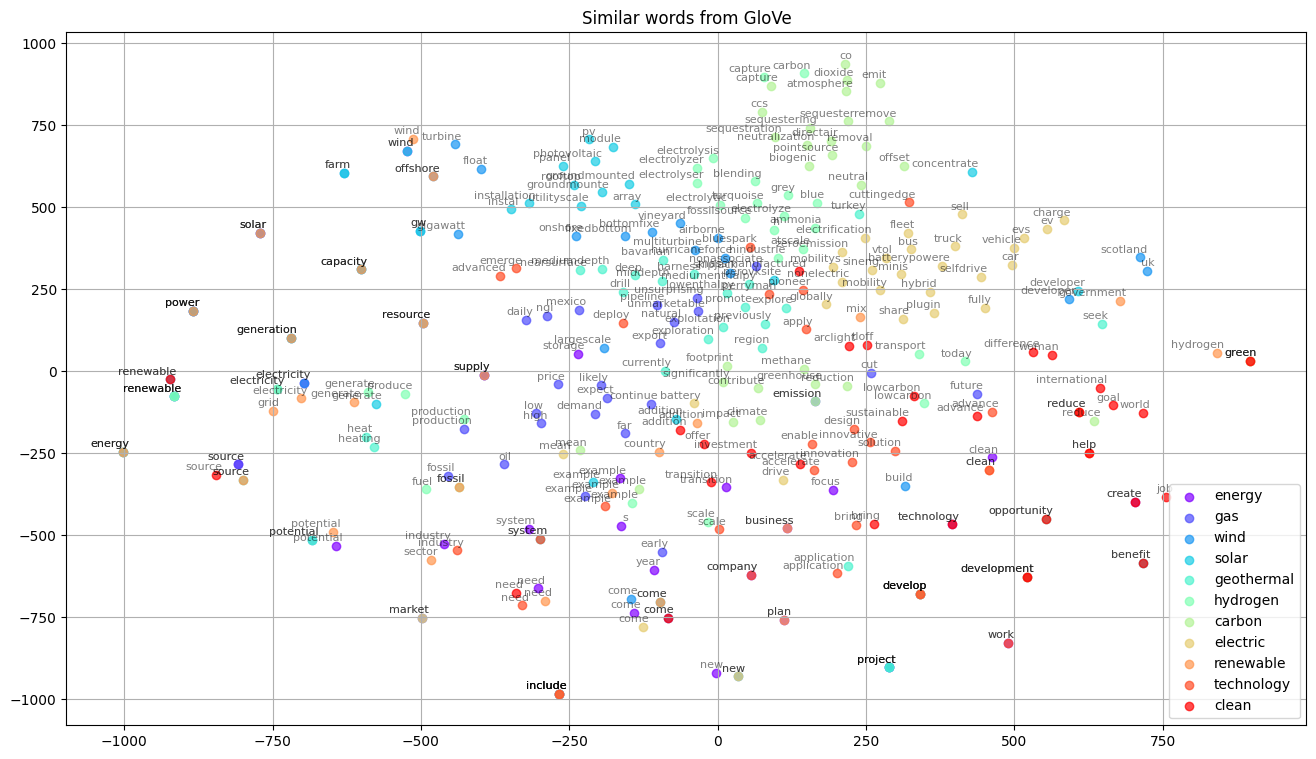

In [56]:
# Determining the shape of the embedding clusters
n, m, k = embedding_clusters.shape

# Initialize t-SNE
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)


embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

# Function to plot t-SNE 2D representation of the word embeddings
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plotting the result
tsne_plot_similar_words('Similar words from GloVe', keys, embeddings_en_2d, word_clusters, 0.7)

# RNN Classification

RNN classification

In [ ]:
# Complete the RNN class
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# # Initialize the model
# rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# # Train the model for ten epochs and zero the gradients
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = rnn_model(X_train_seq)
#     loss = criterion(outputs, y_train_seq)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

In [ ]:
# from torch.nn.utils.rnn import pad_sequence

# # Vectorize the training data
# def vectorize_sequences(sequences, model):
#     vectors = []
#     for sequence in sequences:
#         sequence_vectors = [skip_model.wv[word] for word in sequence if word in skip_model.wv]
#         vectors.append(sequence_vectors)
#     return np.array(vectors)

# X_train_vectors = vectorize_sequences(train_data, skip_model)

# padded_sequences = pad_sequence([torch.tensor(seq) for seq in X_train_vectors], batch_first=True)
# X_train_tensors = padded_sequences

# # Convert the vectors to PyTorch tensors
# #X_train_tensors = torch.tensor(X_train_vectors)
# y_train_tensors = torch.tensor(train_labels, dtype=torch.long)

# # Split the data
# X_train_tensors, X_val_tensors, y_train_tensors, y_val_tensors = train_test_split(
#     X_train_tensors, y_train_tensors, test_size=0.2, random_state=42
# )

# # Define RNN parameters
# input_size = X_train_tensors.shape[2]  # Number of features in the input (size of word embeddings)
# hidden_size = 128
# num_layers = 2
# num_classes = len(set(y_train_seq))

# # Initialize the model
# rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# # Train the model for ten epochs and zero the gradients
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = rnn_model(X_train_tensors)
#     loss = criterion(outputs, y_train_tensors)
#     loss.backward()
#     optimizer.step()
    # print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Evaluate RNN model

In [ ]:
# # Create an instance of the metrics
# accuracy = Accuracy(task="multiclass", num_classes=3)
# precision = Precision(task="multiclass", num_classes=3)
# recall = Recall(task="multiclass", num_classes=3)
# f1 = F1Score(task="multiclass", num_classes=3)

# # Generate the predictions
# outputs = rnn_model(X_test_seq)
# _, predicted = torch.max(outputs, 1)

# # Calculate the metrics
# accuracy_score = accuracy(predicted, y_test_seq)
# precision_score = precision(predicted, y_test_seq)
# recall_score = recall(predicted, y_test_seq)
# f1_score = f1(predicted, y_test_seq)
# print("RNN Model - Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(accuracy_score, precision_score, recall_score, f1_score))